In [378]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import re
import sys
import seaborn as sns
import matplotlib.pyplot as plt

In [379]:
# create dataframe from cbp18cd.csv for us ty18
us_18 = pd.read_csv('cbp18cd.csv')
us_19 = pd.read_excel('cbp19cd.xlsx')
us_20 = pd.read_excel('cbp20cd.xlsx')
us_21 = pd.read_csv('cbp21cd.csv', thousands = ',')

In [380]:
us_18.columns

Index(['State FIPS', 'State', '116th Congressional District',
       '2017 NAICS Code', 'NAICS Description', ' Number of Establishments ',
       ' Employment ', 'Employment Noise Flag',
       ' 1st Quarter Payroll ($1,000) ', '1st Quarter Payroll Noise Flag',
       ' Annual Payroll ($1,000) ', 'Annual Payroll Noise Flag'],
      dtype='object')

In [381]:
# drop columns & rows which are not useful.
df_us18 = ((us_18.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ', 
                        '116th Congressional District',
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_18.loc[us_18['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [382]:
df_us19 = ((us_19.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag','1st Quarter Payroll ($1,000)',
                        '116th Congressional District',
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_19.loc[us_19['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [383]:
df_us20 = ((us_20.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag','1st Quarter Payroll ($1,000)',
                        '116th Congressional District',
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_19.loc[us_19['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [384]:
df_us21 = ((us_21.drop(['State FIPS', '2017 NAICS Code', 'Employment Noise Flag',' 1st Quarter Payroll ($1,000) ',
                        '118th Congressional District',
                          '1st Quarter Payroll Noise Flag','Annual Payroll Noise Flag'], axis = 1)
                          .drop(us_21.loc[us_21['NAICS Description'] == 'Total for all sectors'].index, axis=0)
                          .dropna(axis=0)))

In [385]:
df_us21.columns

Index(['State', 'NAICS Description', ' Number of Establishments ',
       ' Employment ', ' Annual Payroll ($1,000) '],
      dtype='object')

In [386]:
df_us18['AverageSalary'] = (df_us18[' Annual Payroll ($1,000) '] * 1000 / df_us18[' Employment ']).round()
df_us19['AverageSalary'] = (df_us19['Annual Payroll ($1,000)'] * 1000 / df_us19['Employment']).round()
df_us20['AverageSalary'] = (df_us20['Annual Payroll ($1,000)'] * 1000 / df_us20['Employment']).round()
df_us21['AverageSalary'] = (df_us21[' Annual Payroll ($1,000) '] * 1000 / df_us21[' Employment ']).round()

In [387]:
df_us18.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)
df_us19.drop(['Annual Payroll ($1,000)'], axis=1, inplace = True)
df_us20.drop(['Annual Payroll ($1,000)'], axis=1, inplace = True)
df_us21.drop([' Annual Payroll ($1,000) '], axis=1, inplace = True)

In [388]:
col_lis18 = list(df_us18.columns)
col_lis19 = list(df_us19.columns)
col_lis20 = list(df_us20.columns)
col_lis21 = list(df_us21.columns)

for i in range(5):
    if i <= 1:
        col_lis18[i] = col_lis18[i].replace(' ','')
        col_lis19[i] = col_lis19[i].replace(' ','')
        col_lis20[i] = col_lis20[i].replace(' ','')
        col_lis21[i] = col_lis21[i].replace(' ','')    
    else:
        col_lis18[i] = col_lis18[i].replace(' ','') + '_18'
        col_lis19[i] = col_lis19[i].replace(' ','') + '_19'
        col_lis20[i] = col_lis20[i].replace(' ','') + '_20'
        col_lis21[i] = col_lis21[i].replace(' ','') + '_21'

df_us18.columns = col_lis18
df_us19.columns = col_lis19
df_us20.columns = col_lis20
df_us21.columns = col_lis21
df_us18



,State,NAICSDescription,NumberofEstablishments_18,Employment_18,AverageSalary_18
1,Alabama,"Agriculture, forestry, fishing and hunting",142.0,1127.0,39800.0
2,Alabama,"Mining, quarrying, and oil and gas extraction",34.0,500.0,83570.0
3,Alabama,Utilities,56.0,1618.0,93771.0
4,Alabama,Construction,1367.0,16277.0,52559.0
5,Alabama,Manufacturing,568.0,27761.0,68348.0
...,...,...,...,...,...
9099,Puerto Rico,Health care and social assistance,7440.0,78776.0,26528.0
9100,Puerto Rico,"Arts, entertainment, and recreation",438.0,3521.0,21028.0
9101,Puerto Rico,Accommodation and food services,4661.0,74476.0,14889.0
9102,Puerto Rico,Other services (except public administration),3218.0,17387.0,20075.0


In [389]:
df_us18['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)
df_us19['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)
df_us20['NAICSDescription'].replace('Professional, scientific, and technical', 'Professional, scientific, and technical services', inplace = True)

df_us18['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)
df_us19['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)
df_us20['NAICSDescription'].replace('Administrative and support and waste','Administrative and support and waste management' , inplace = True)

In [390]:
print(len(df_us18))
print(len(df_us19))
print(len(df_us20))
print(len(df_us21))

8667
8660
8656
8675


In [391]:
df_us18 = (df_us18.groupby(['State', 'NAICSDescription']).agg({'NumberofEstablishments_18':np.sum, 'Employment_18': np.sum, 'AverageSalary_18': np.sum})
                                                .reset_index())
df_us19 = (df_us19.groupby(['State', 'NAICSDescription']).agg({'NumberofEstablishments_19':np.sum, 'Employment_19': np.sum, 'AverageSalary_19': np.sum})
                                                .reset_index())
df_us20 = (df_us20.groupby(['State', 'NAICSDescription']).agg({'NumberofEstablishments_20':np.sum, 'Employment_20': np.sum, 'AverageSalary_20': np.sum})
                                              .reset_index())
df_us21 = (df_us21.groupby(['State', 'NAICSDescription']).agg({'NumberofEstablishments_21':np.sum, 'Employment_21': np.sum, 'AverageSalary_21': np.sum})
                                                .reset_index())

In [392]:
us = (df_us18.merge(df_us19, how = 'inner', on = ['State', 'NAICSDescription'])
              .merge(df_us20, how = 'inner', on = ['State', 'NAICSDescription'])
              .merge(df_us21, how = 'inner', on = ['State','NAICSDescription']))
us


,State,NAICSDescription,NumberofEstablishments_18,Employment_18,AverageSalary_18,NumberofEstablishments_19,Employment_19,AverageSalary_19,NumberofEstablishments_20,Employment_20,AverageSalary_20,NumberofEstablishments_21,Employment_21,AverageSalary_21
0,Alabama,Accommodation and food services,9142.0,189831.0,109931.0,9330.0,193954.0,113399.0,9321.0,191514.0,103842.0,9562.0,172181.0,132785.0
1,Alabama,Administrative and support and waste management,4336.0,106341.0,209181.0,4443.0,104829.0,215502.0,4605.0,108028.0,217895.0,4910.0,109541.0,238287.0
2,Alabama,"Agriculture, forestry, fishing and hunting",801.0,6229.0,294135.0,796.0,6412.0,305105.0,777.0,6380.0,322281.0,792.0,6548.0,329471.0
3,Alabama,"Arts, entertainment, and recreation",1206.0,20626.0,123988.0,1226.0,21219.0,128645.0,1233.0,21505.0,117400.0,1277.0,17109.0,158150.0
4,Alabama,Construction,7669.0,85655.0,363639.0,7784.0,90987.0,371657.0,7954.0,92175.0,386050.0,8427.0,94253.0,409010.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017,Wyoming,Real estate and rental and leasing,1216.0,4619.0,52705.0,1238.0,4644.0,52645.0,1254.0,4621.0,50271.0,1318.0,4410.0,55294.0
1018,Wyoming,Retail trade,2539.0,30166.0,29797.0,2559.0,30007.0,31049.0,2550.0,29895.0,31999.0,2612.0,30698.0,34088.0
1019,Wyoming,Transportation and warehousing,951.0,9516.0,54102.0,965.0,9712.0,56169.0,957.0,9840.0,54425.0,968.0,9429.0,57377.0
1020,Wyoming,Utilities,141.0,2600.0,94753.0,155.0,2674.0,97675.0,153.0,2642.0,95460.0,145.0,2517.0,97597.0


In [393]:
#for i in us.State.unique():
#    (us.loc[us.State == i].plot('NAICSDescription',['NumberofEstablishments_18','NumberofEstablishments_19','NumberofEstablishments_20',
#                                                    'NumberofEstablishments_21'], kind = 'bar', figsize = (16, 5),
#                                                    fontsize = 12, rot = 90, title = i))

In [394]:
us['EmplmntDiffBtwn19_18'] = us['Employment_19'] - us['Employment_18']
us['EmplmntDiffBtwn20_19'] = us['Employment_20'] - us['Employment_19']
us['EmplmntDiffBtwn21_20'] = us['Employment_21'] - us['Employment_20']

In [420]:
us.loc[(us['State'] == 'California') & (us['NAICSDescription'] == 'Accommodation and food services')]

,State,NAICSDescription,NumberofEstablishments_18,Employment_18,AverageSalary_18,NumberofEstablishments_19,Employment_19,AverageSalary_19,NumberofEstablishments_20,Employment_20,AverageSalary_20,NumberofEstablishments_21,Employment_21,AverageSalary_21,EmplmntDiffBtwn19_18,EmplmntDiffBtwn20_19,EmplmntDiffBtwn21_20
80,California,Accommodation and food services,91244.0,1780500.0,1187995.0,92203.0,1801216.0,1249291.0,90444.0,1777511.0,1022809.0,90846.0,1401055.0,1504234.0,20716.0,-23705.0,-376456.0


c:\Users\shree\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


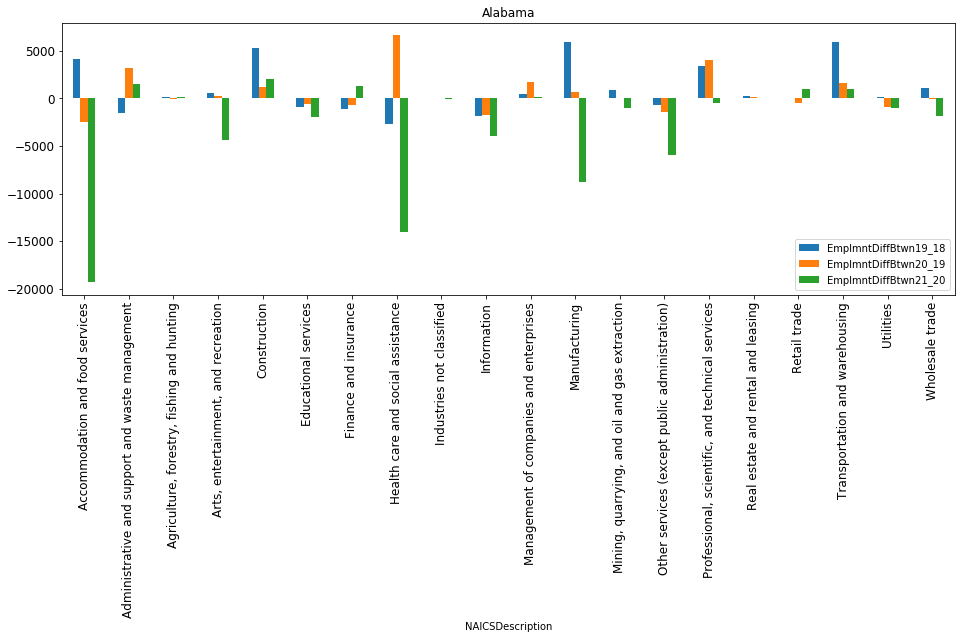

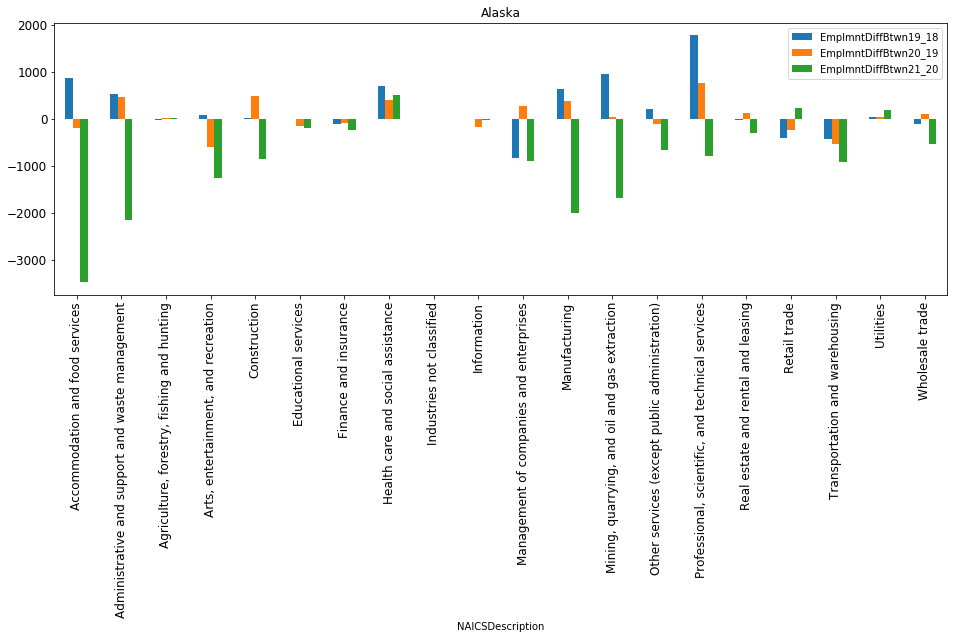

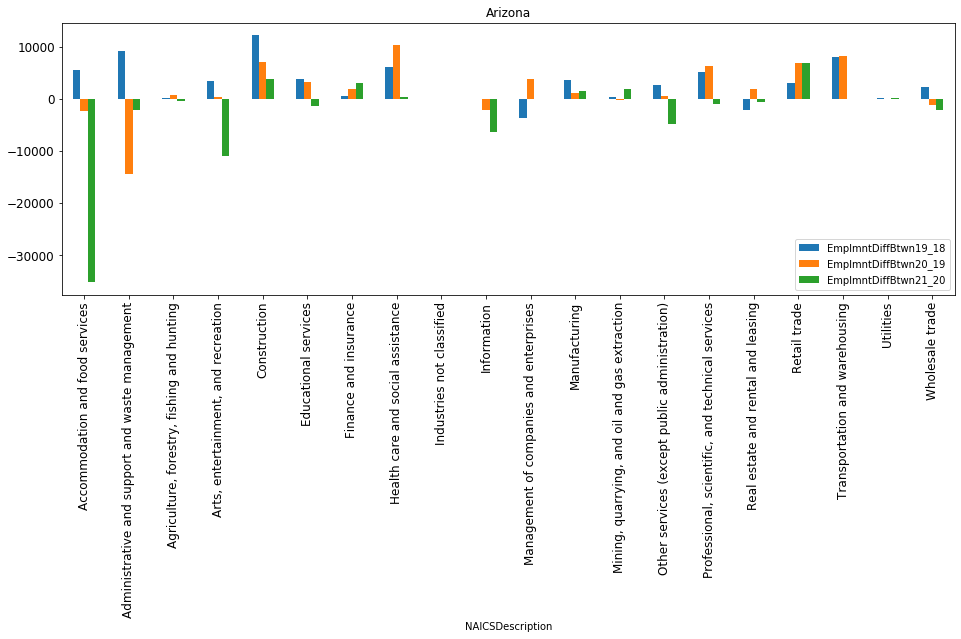

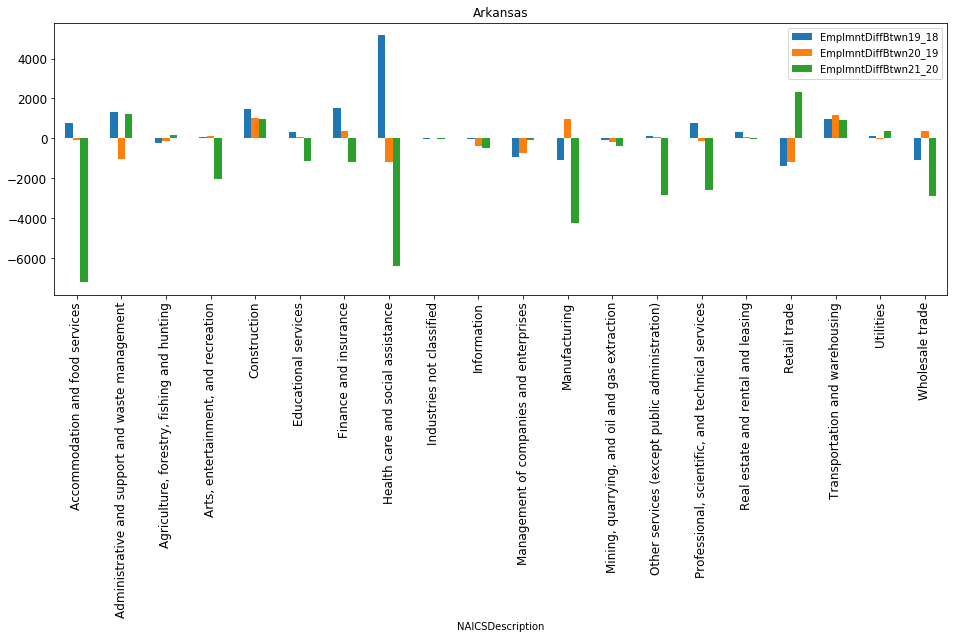

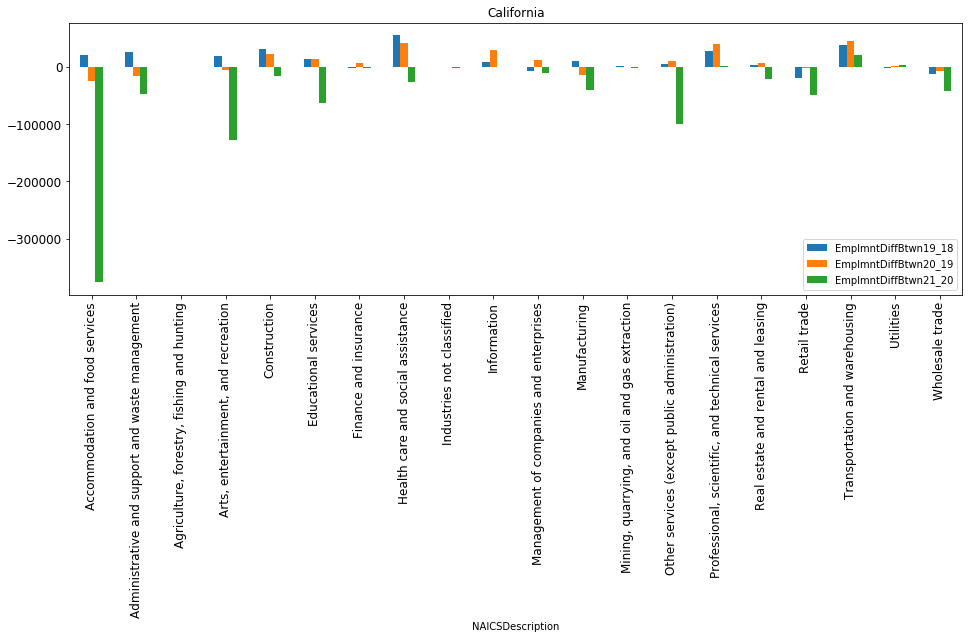

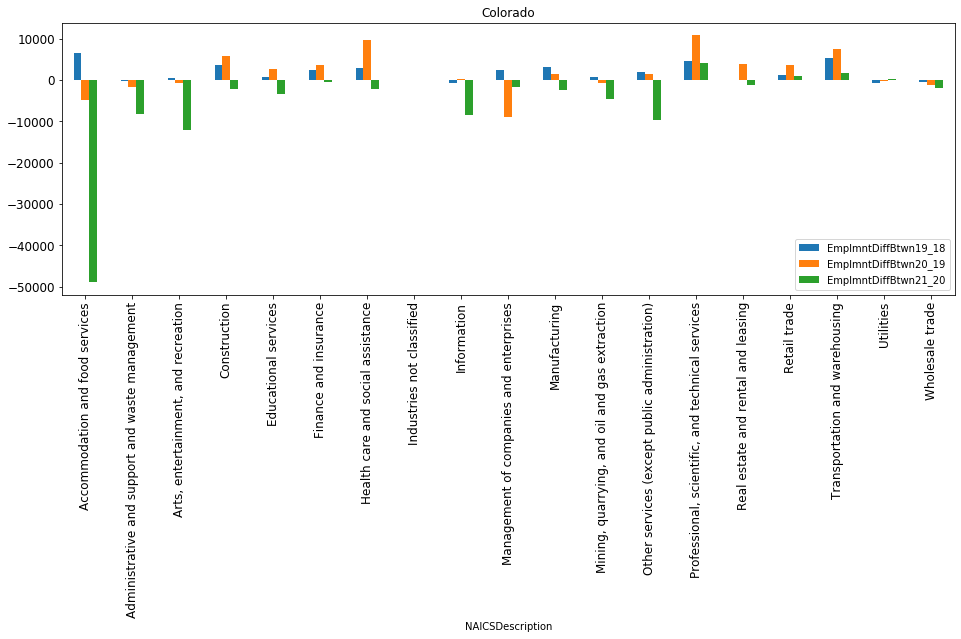

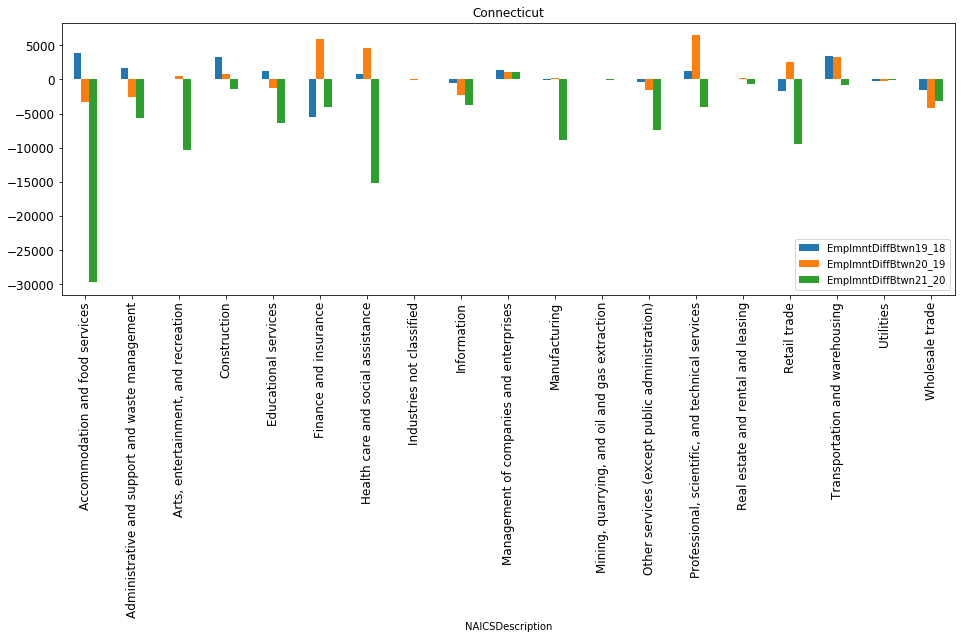

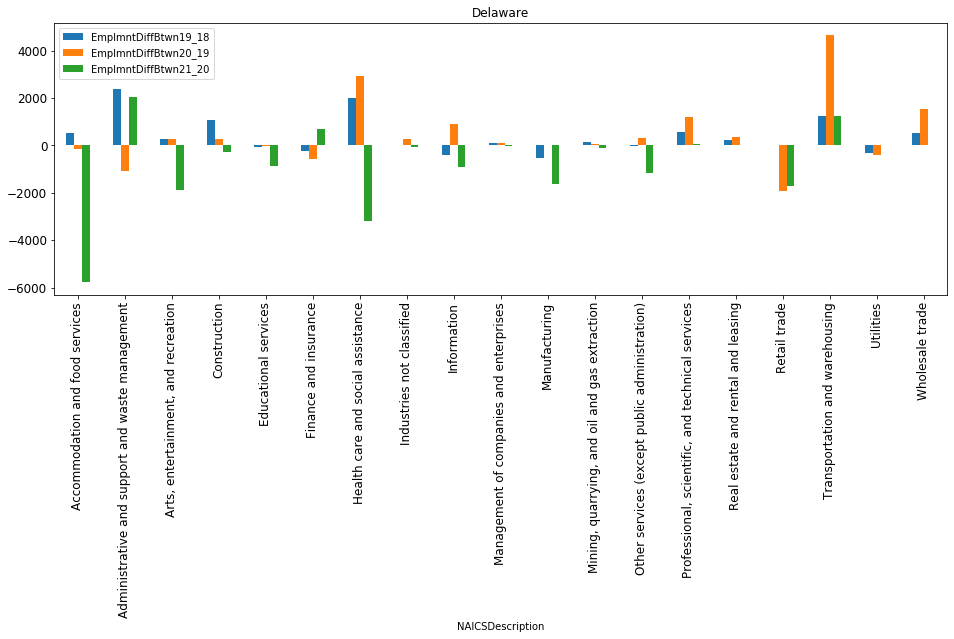

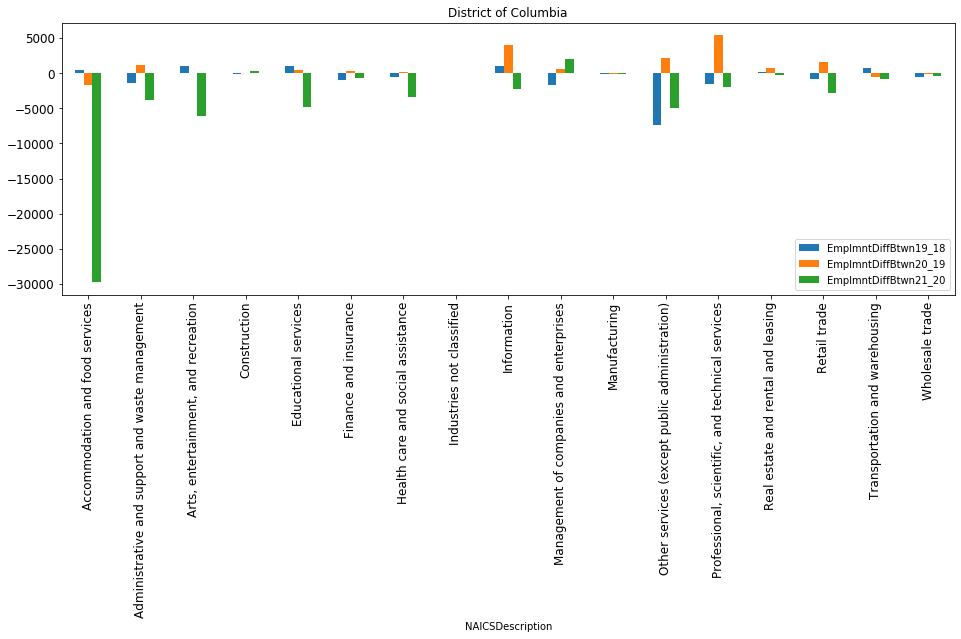

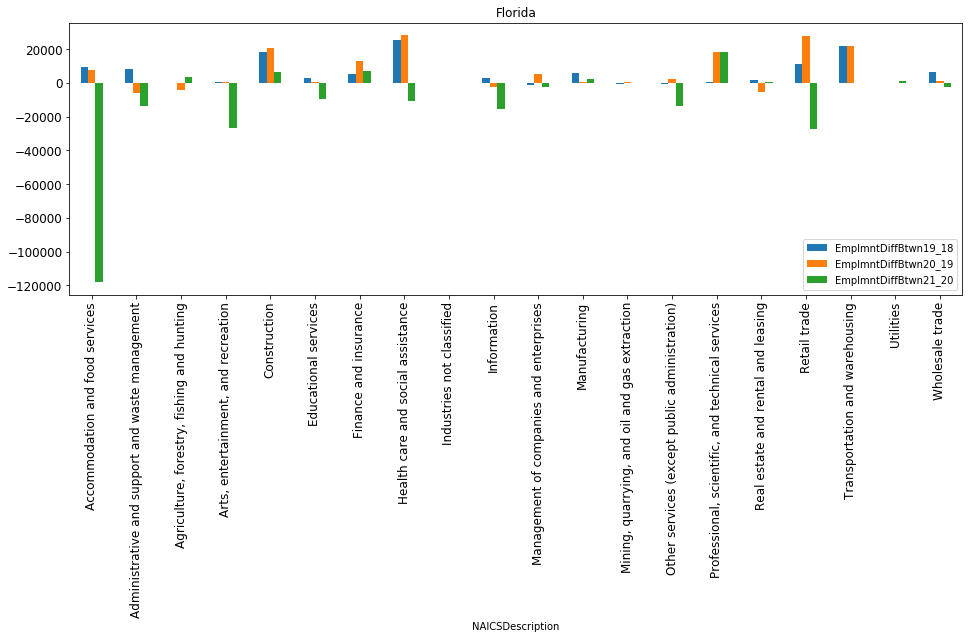

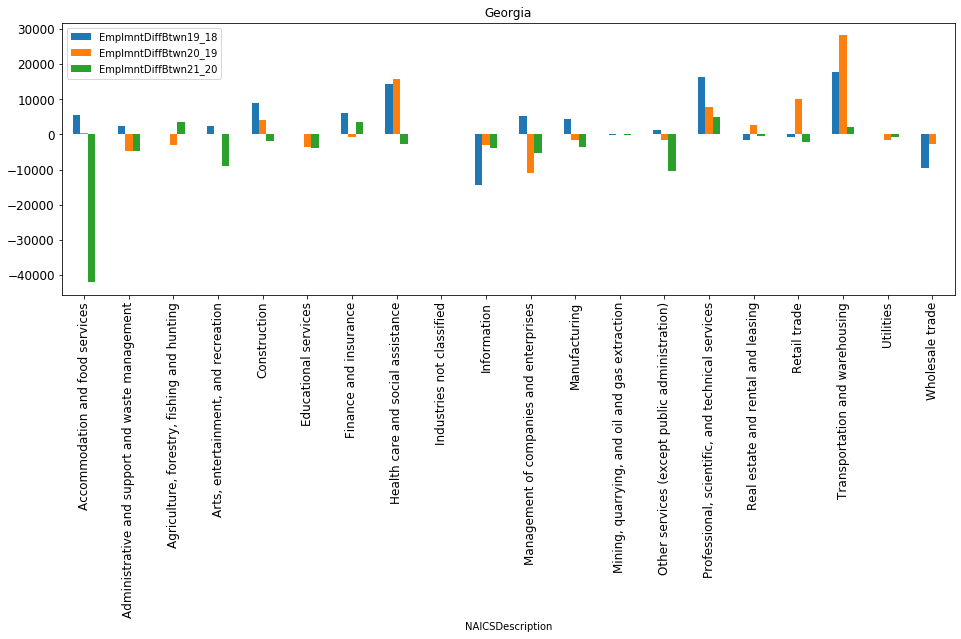

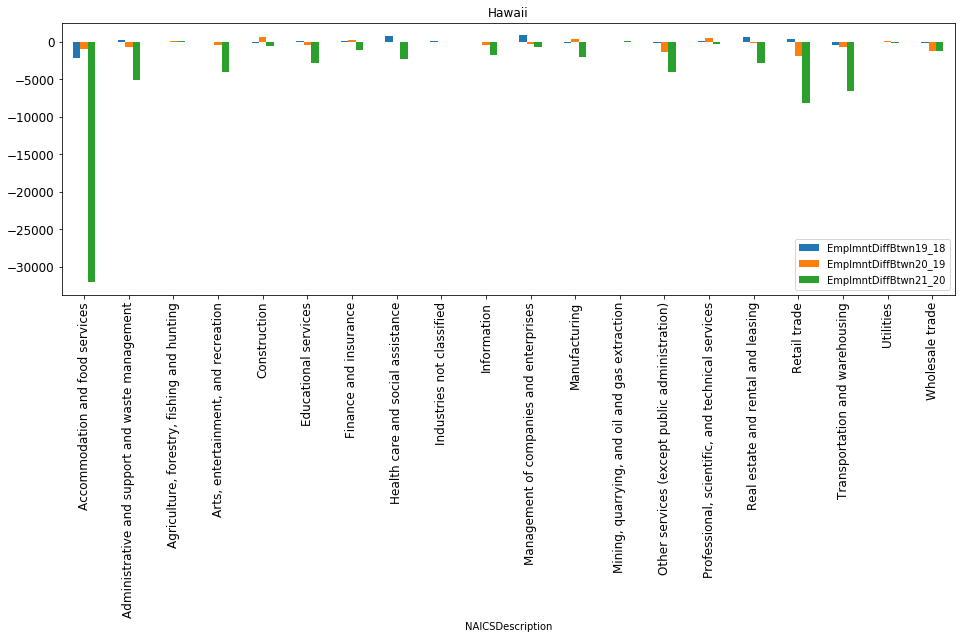

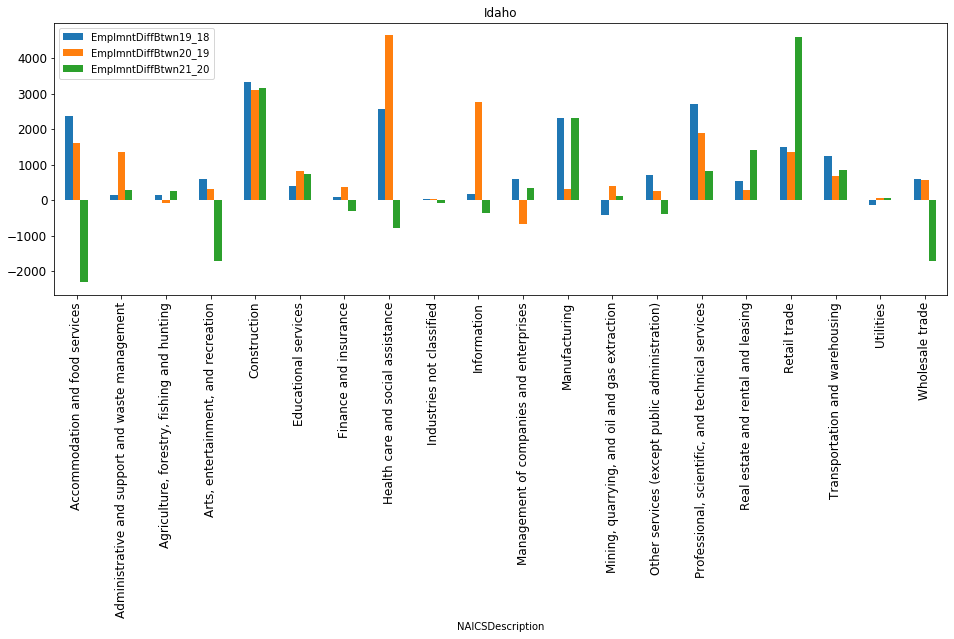

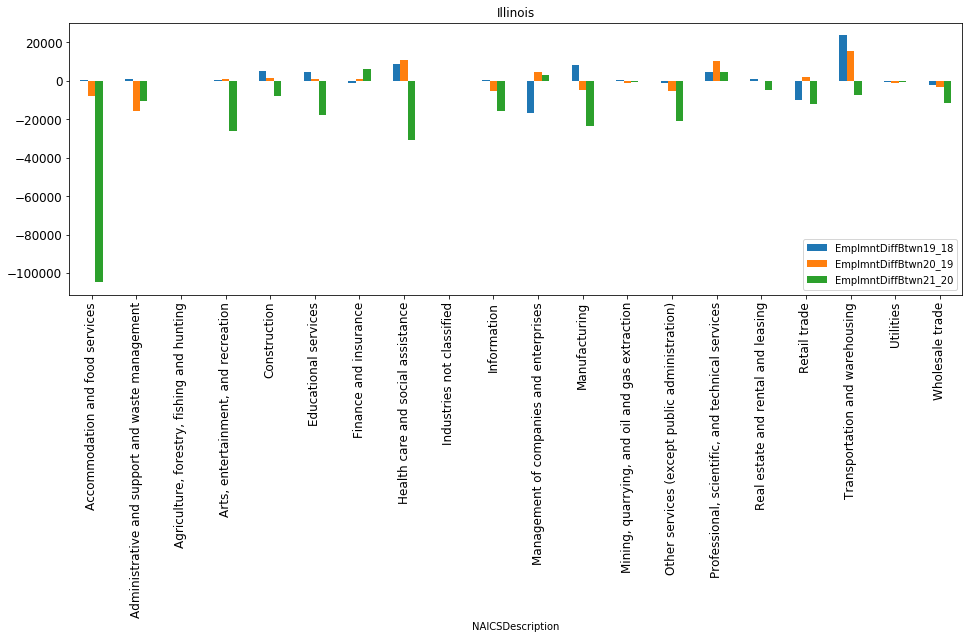

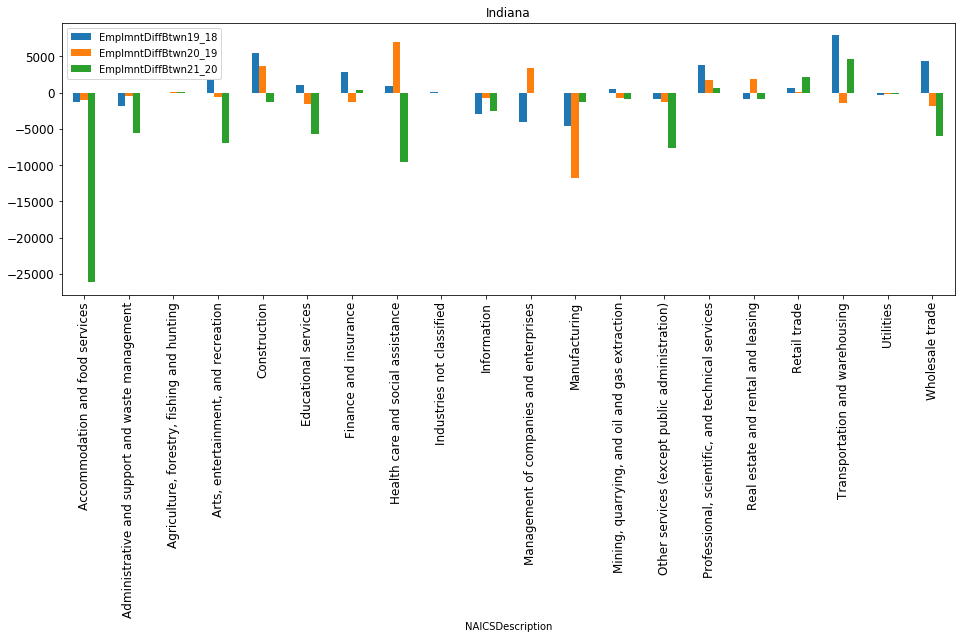

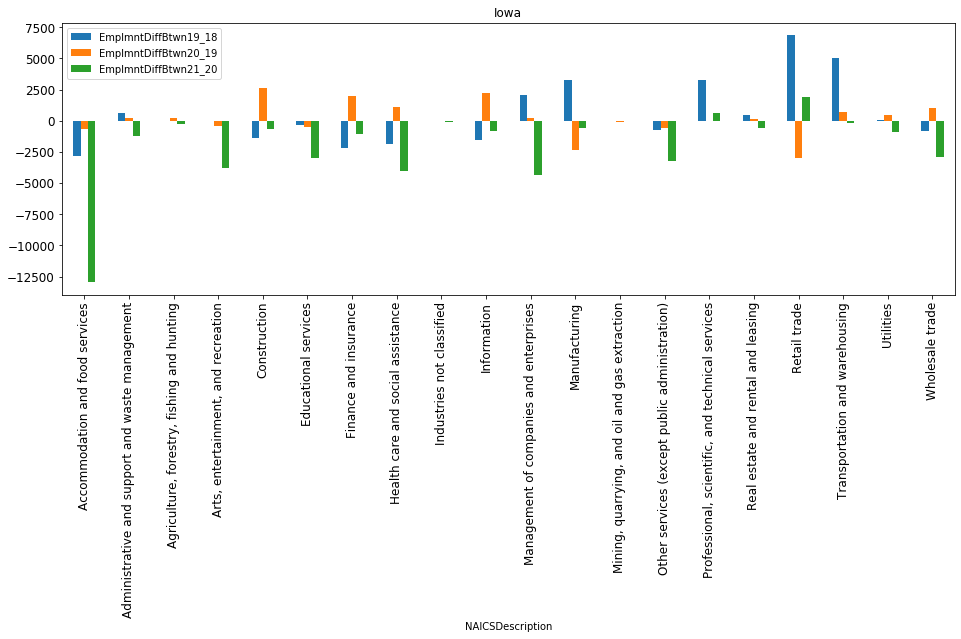

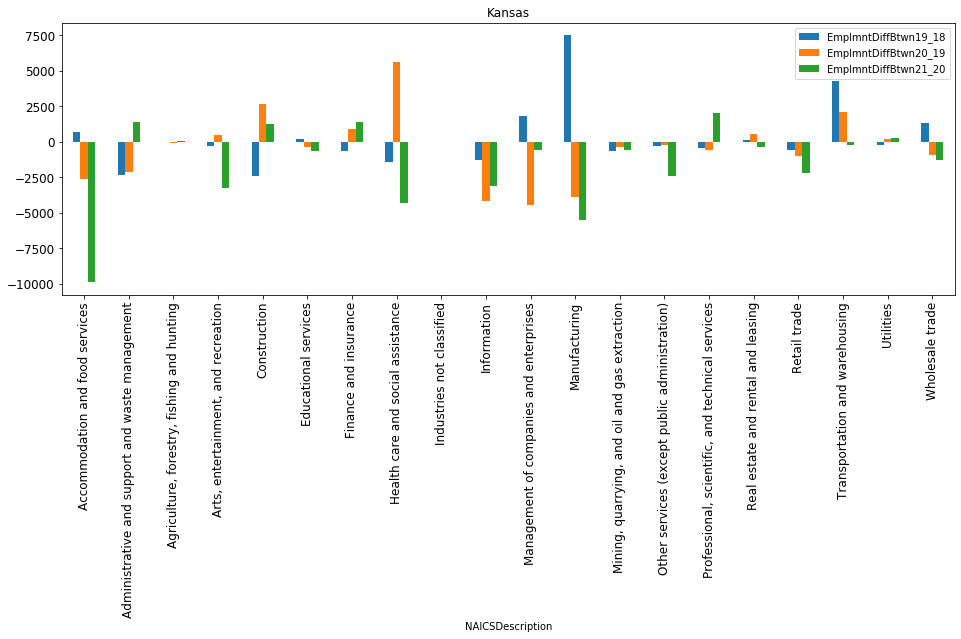

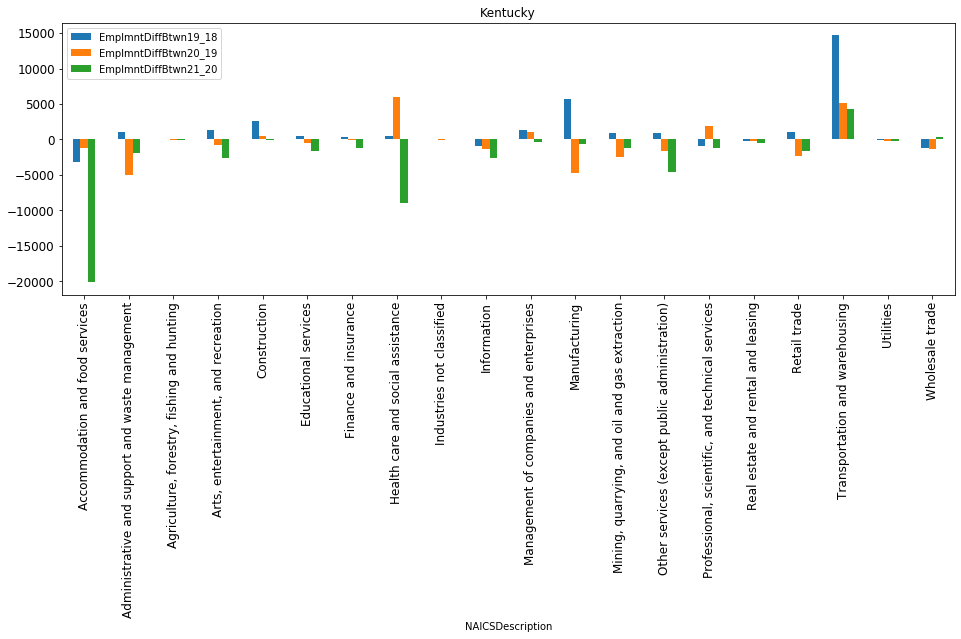

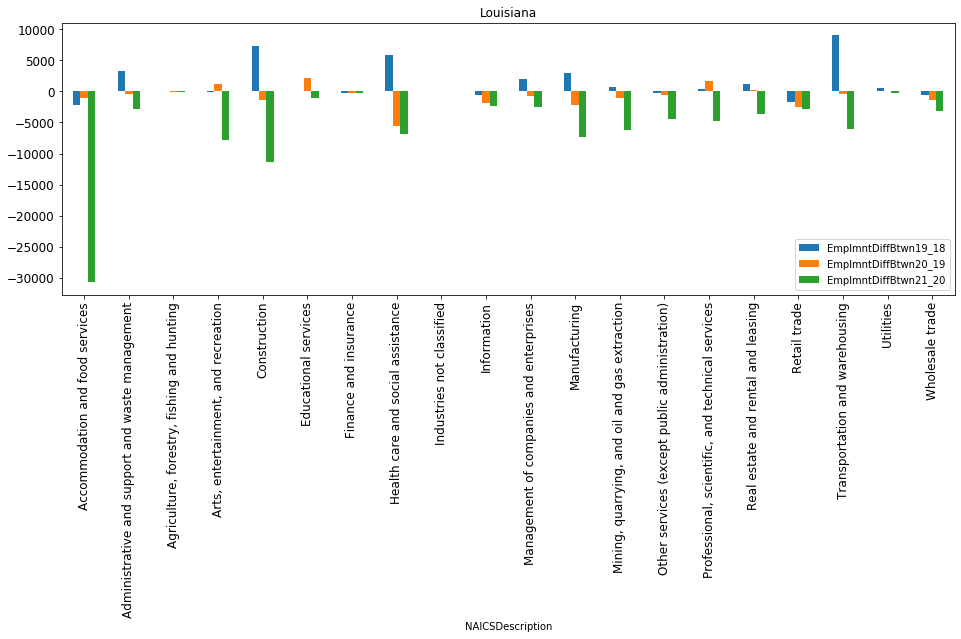

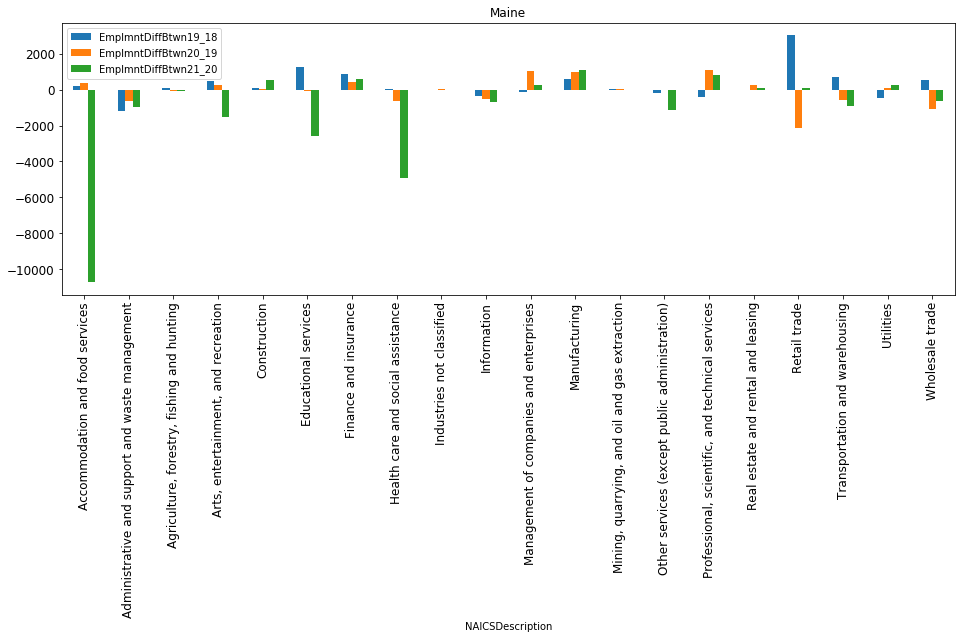

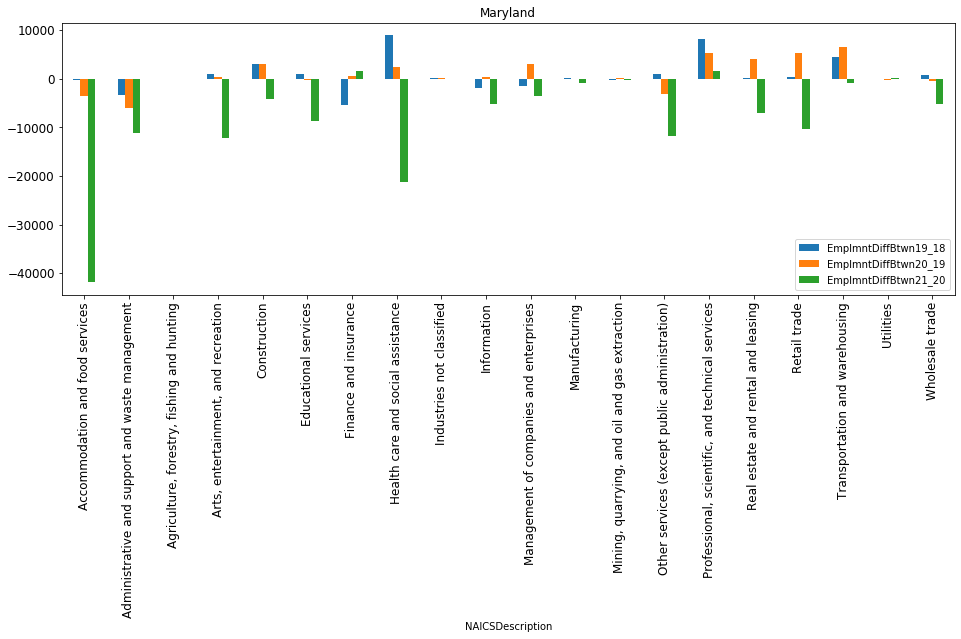

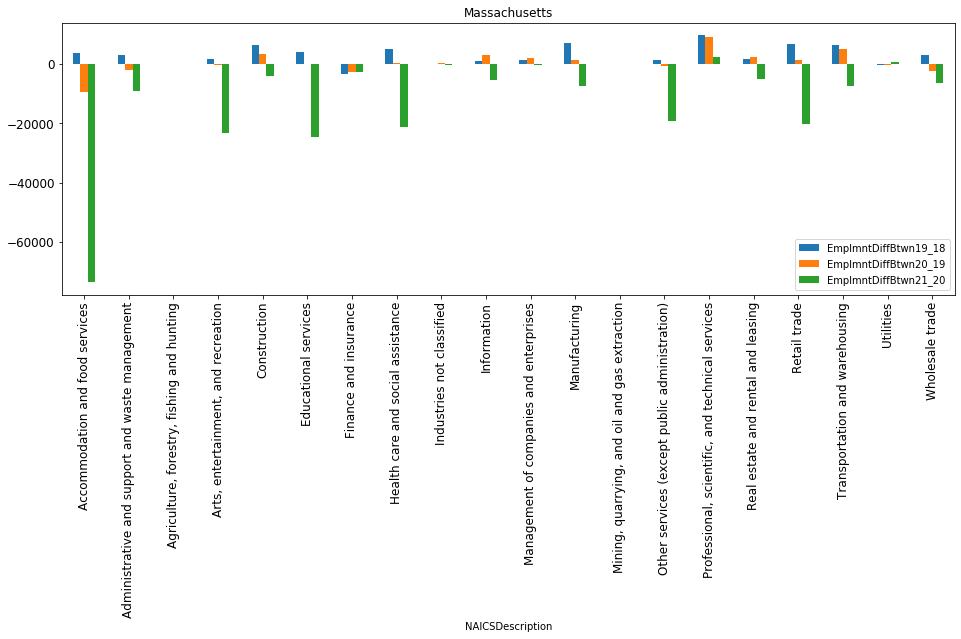

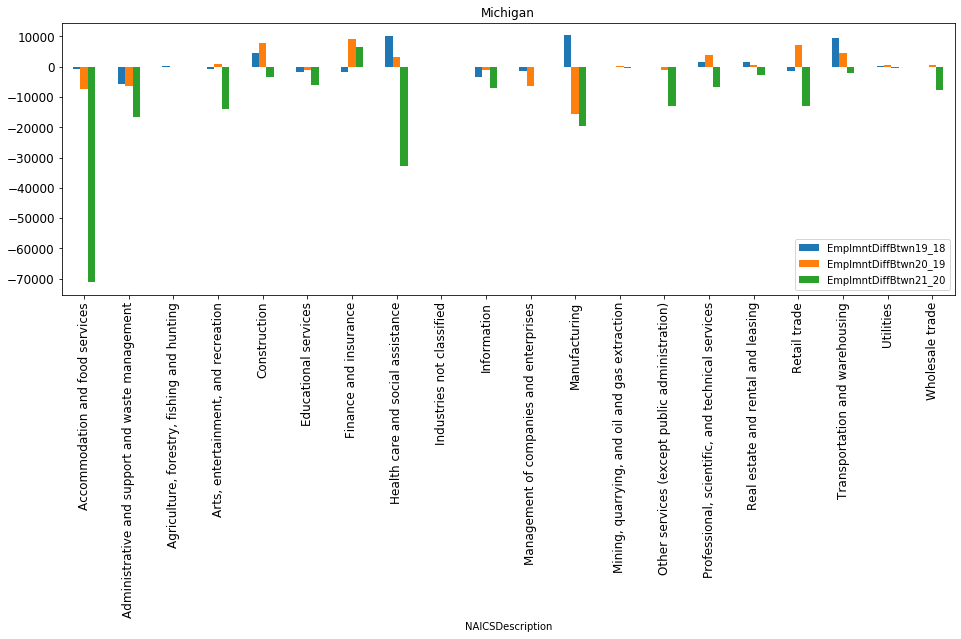

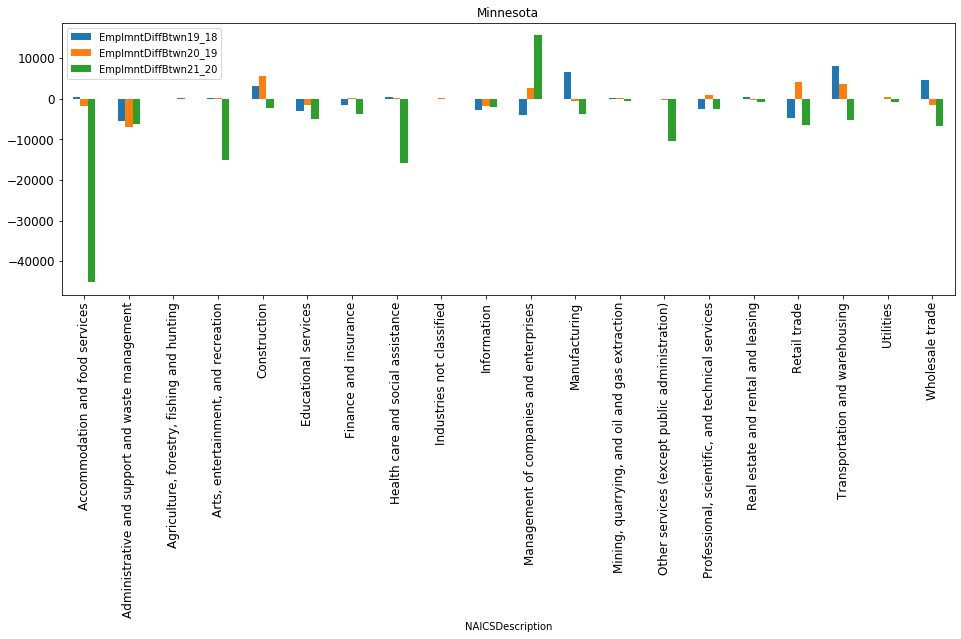

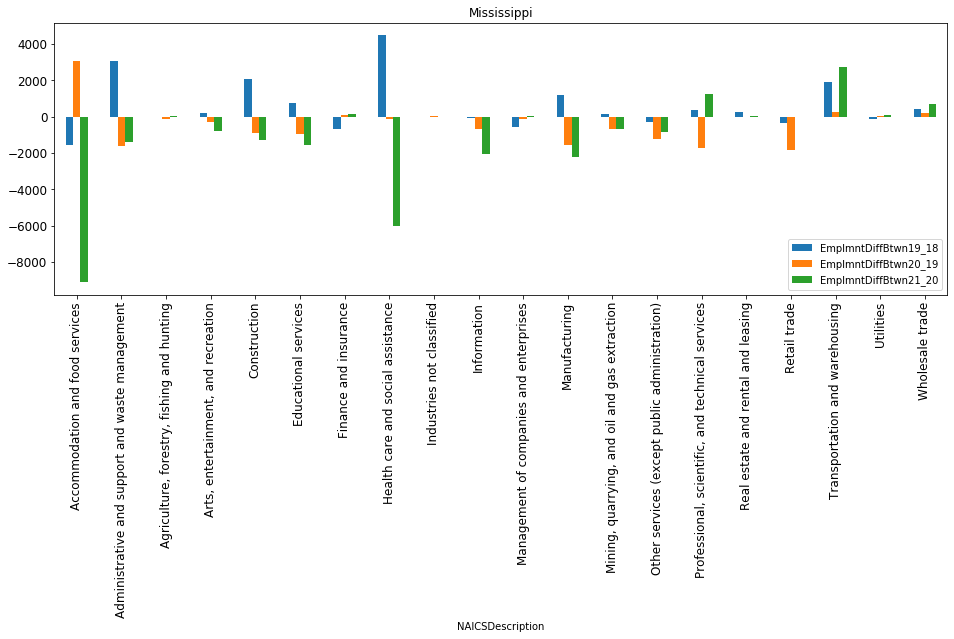

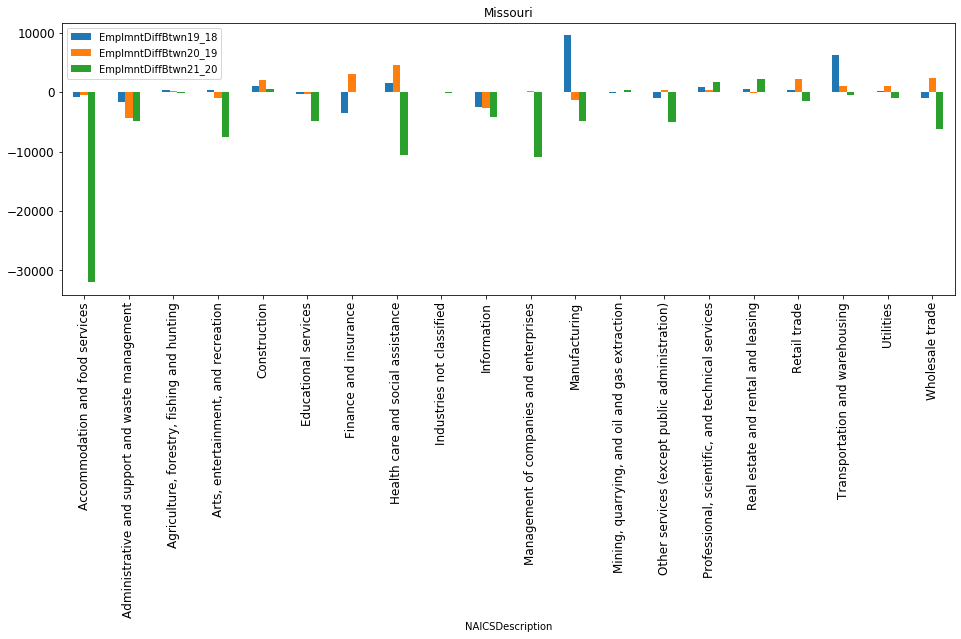

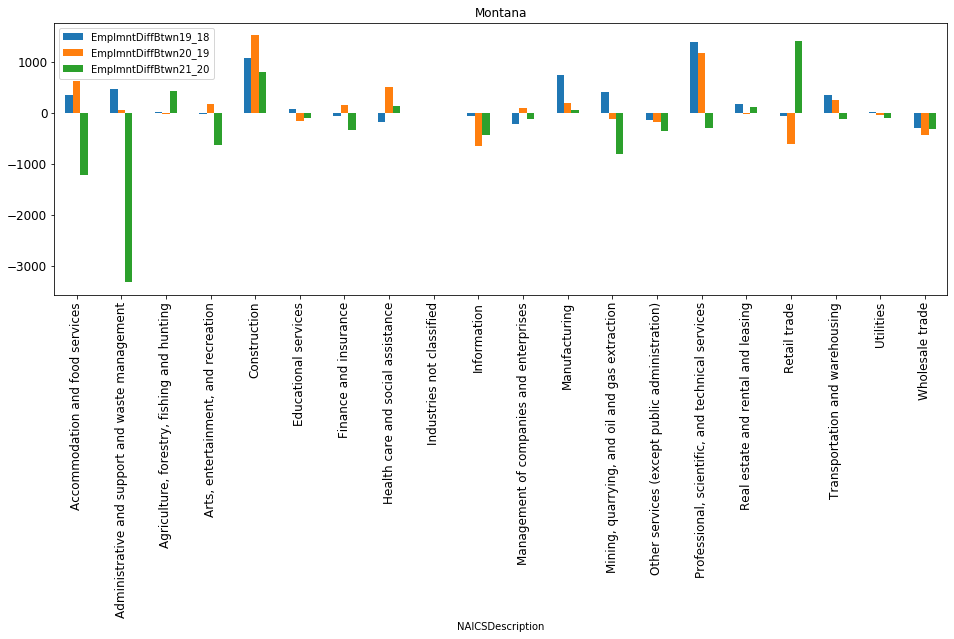

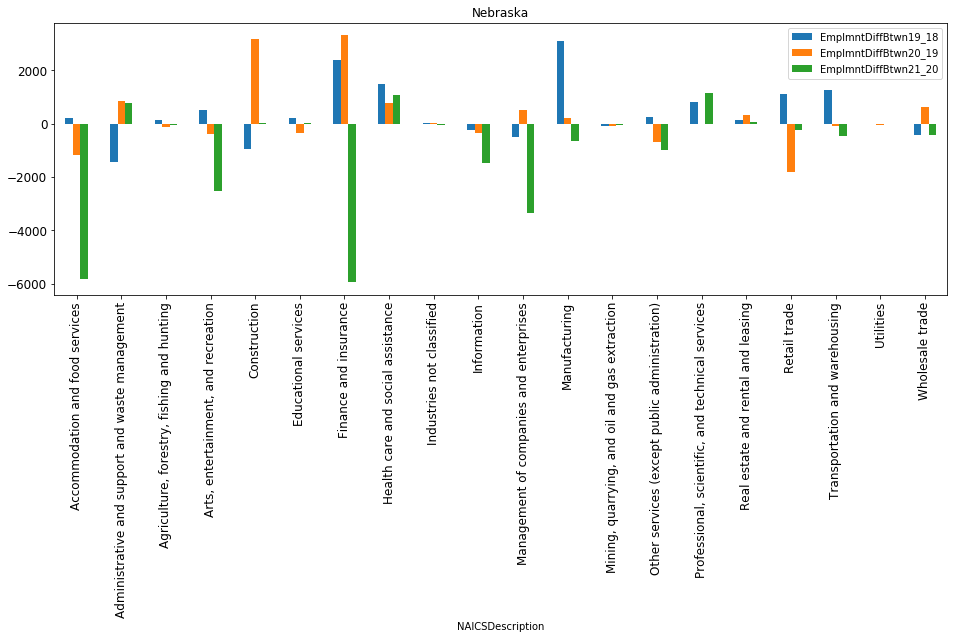

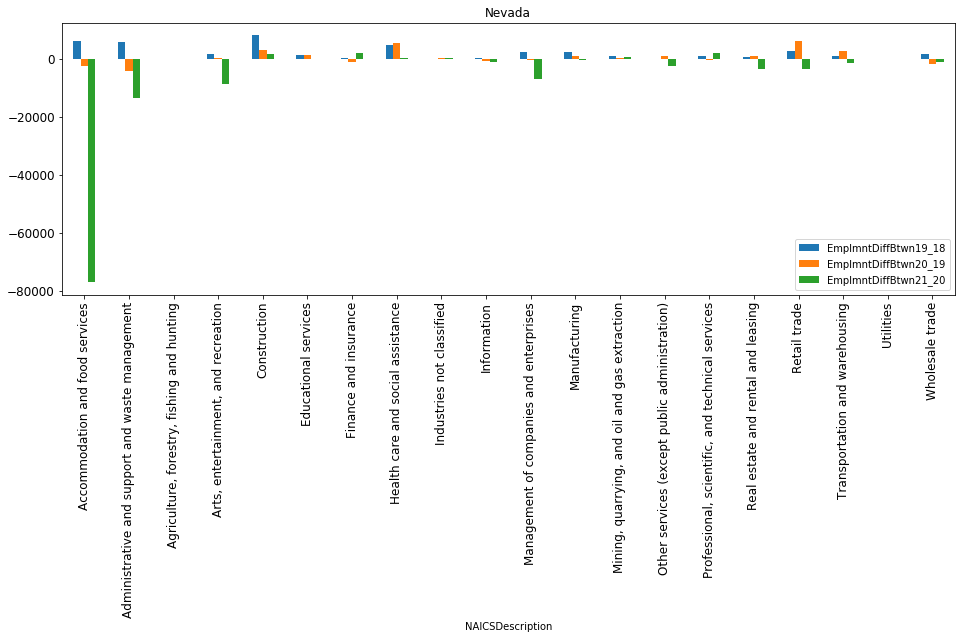

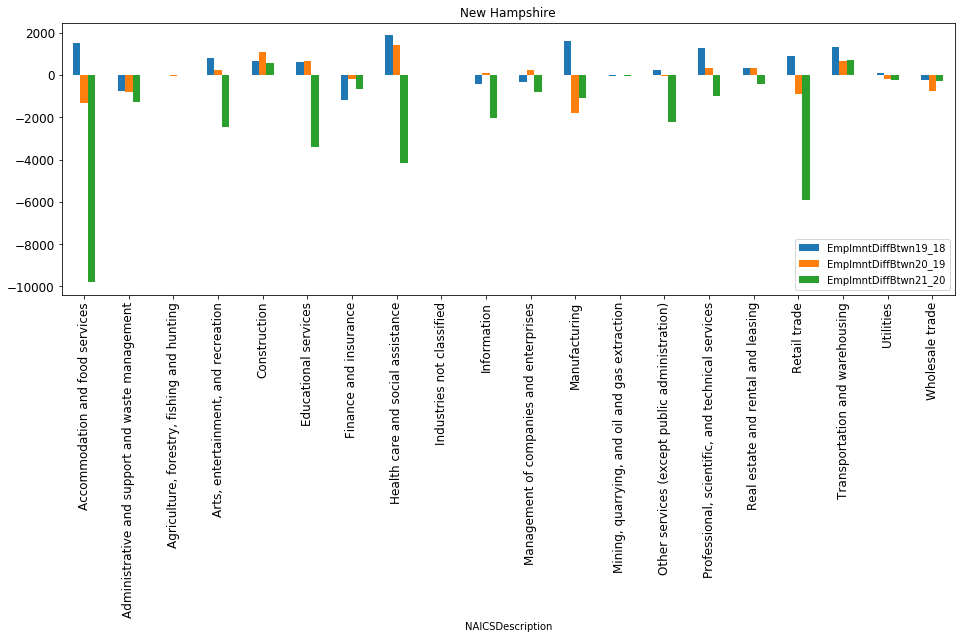

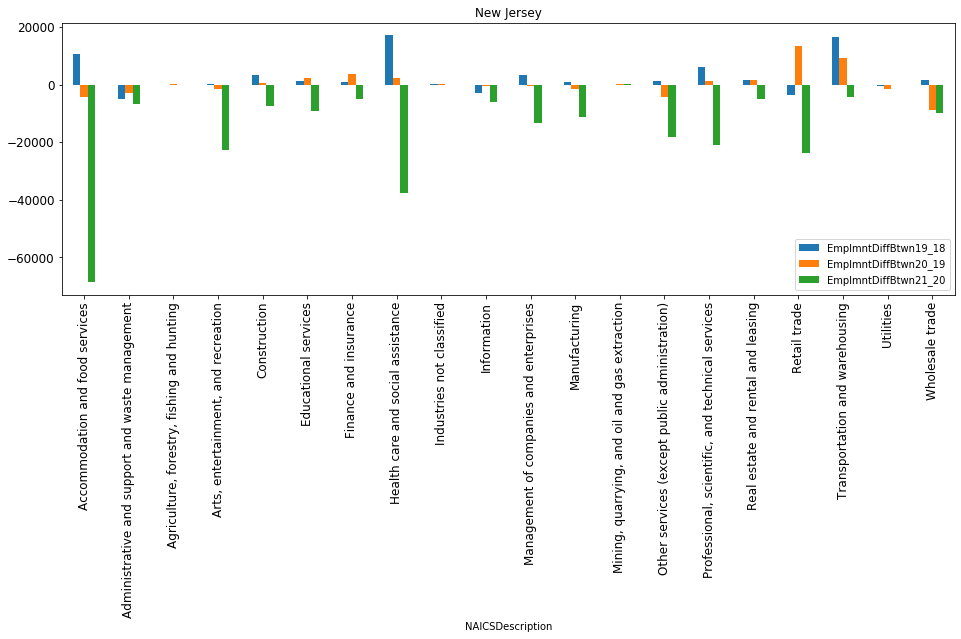

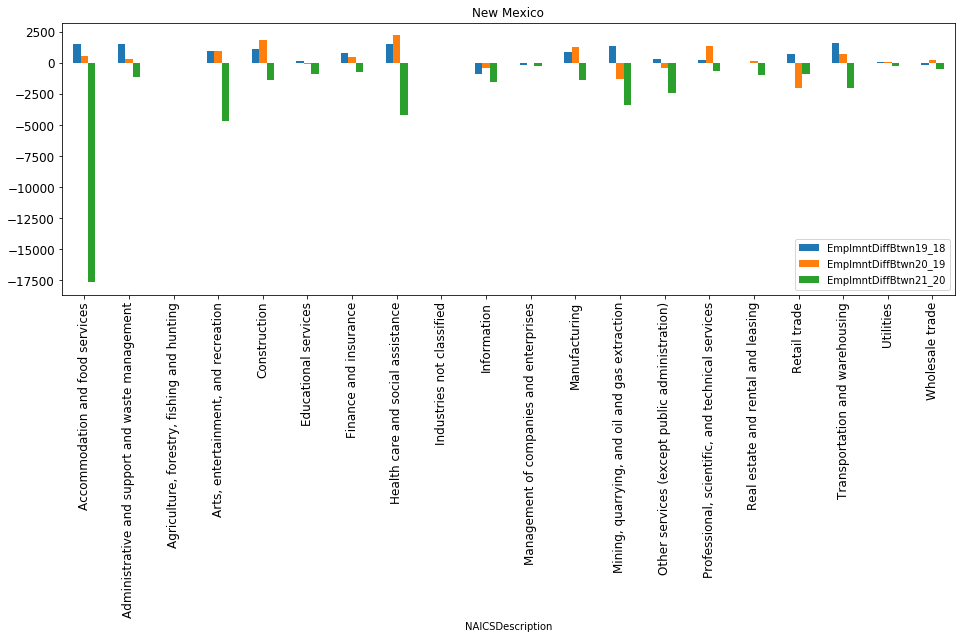

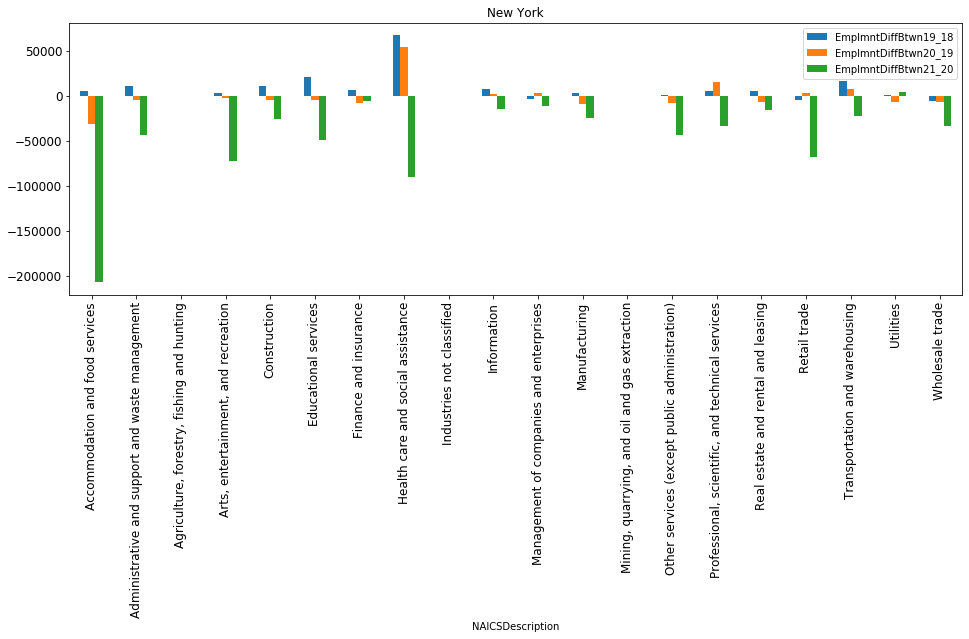

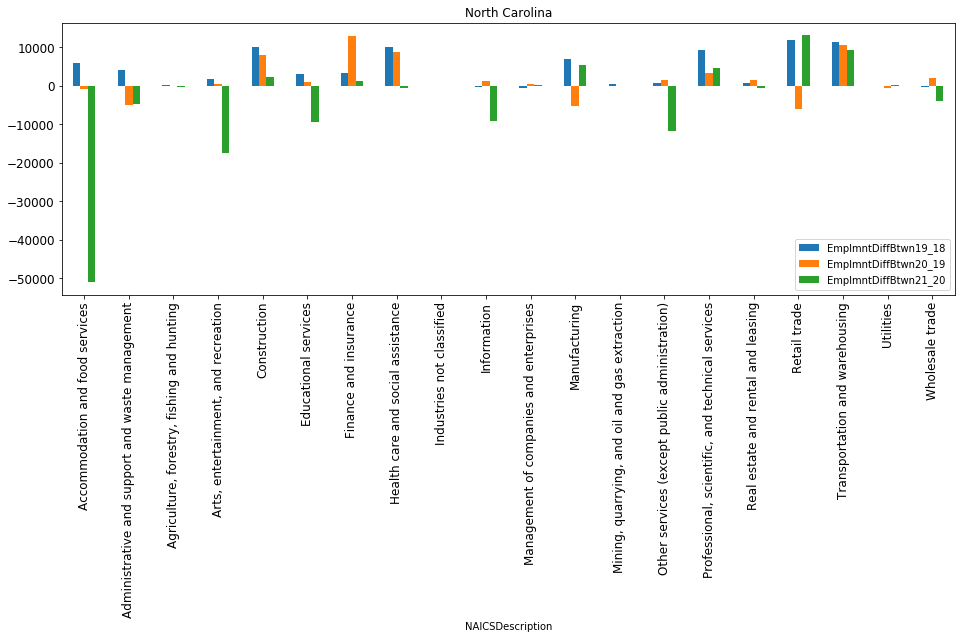

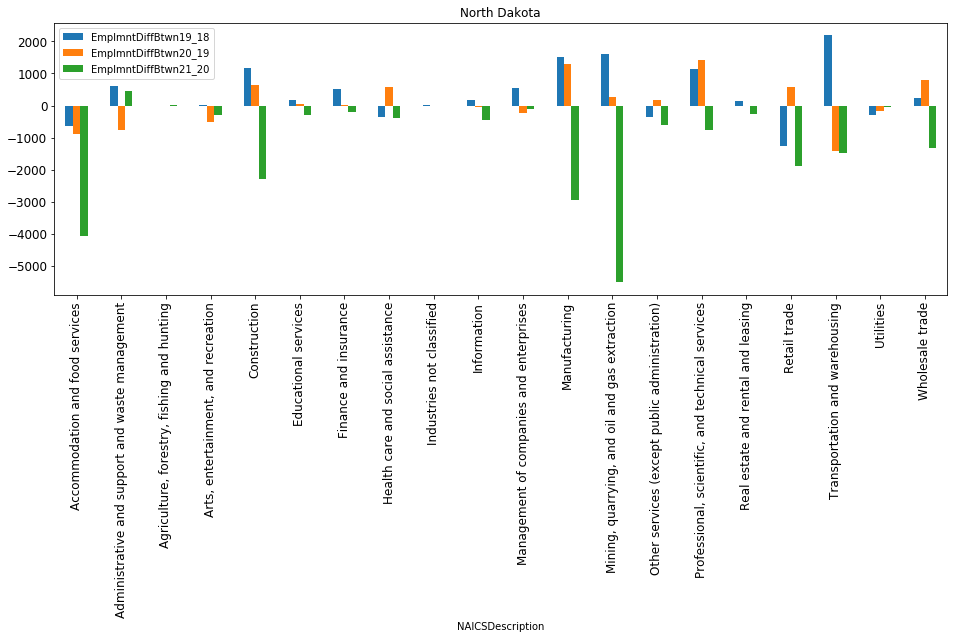

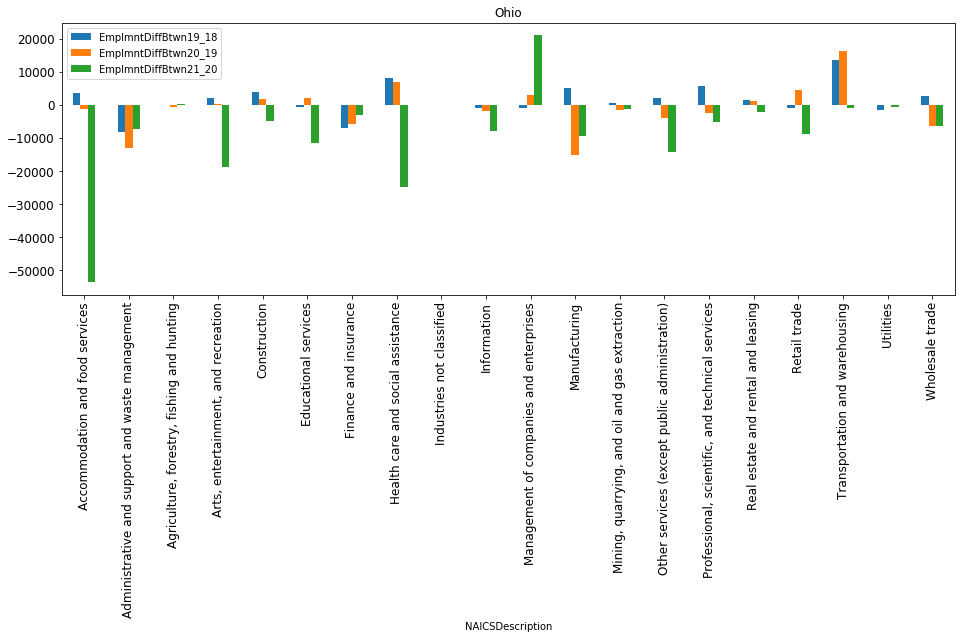

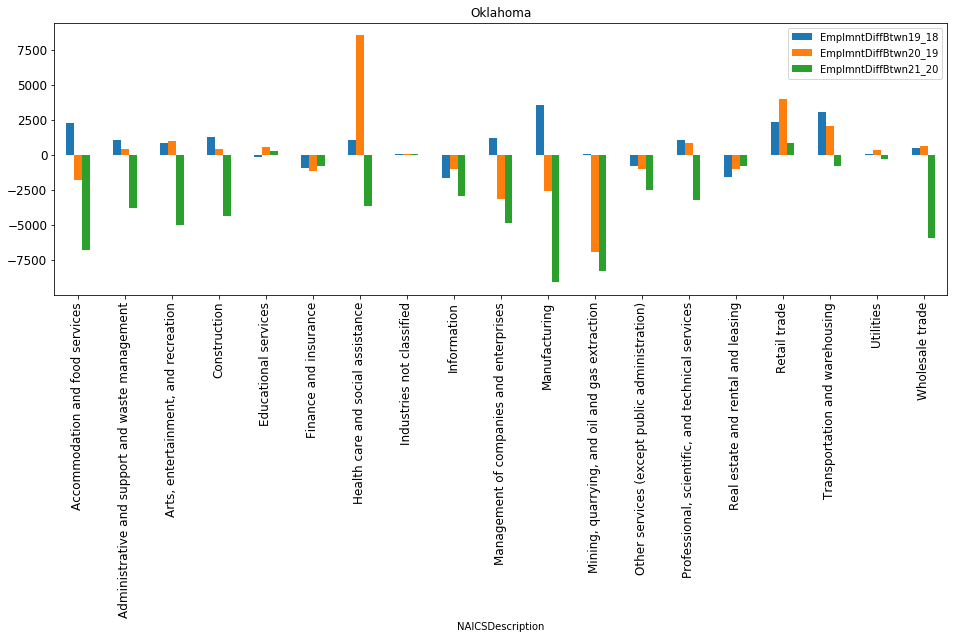

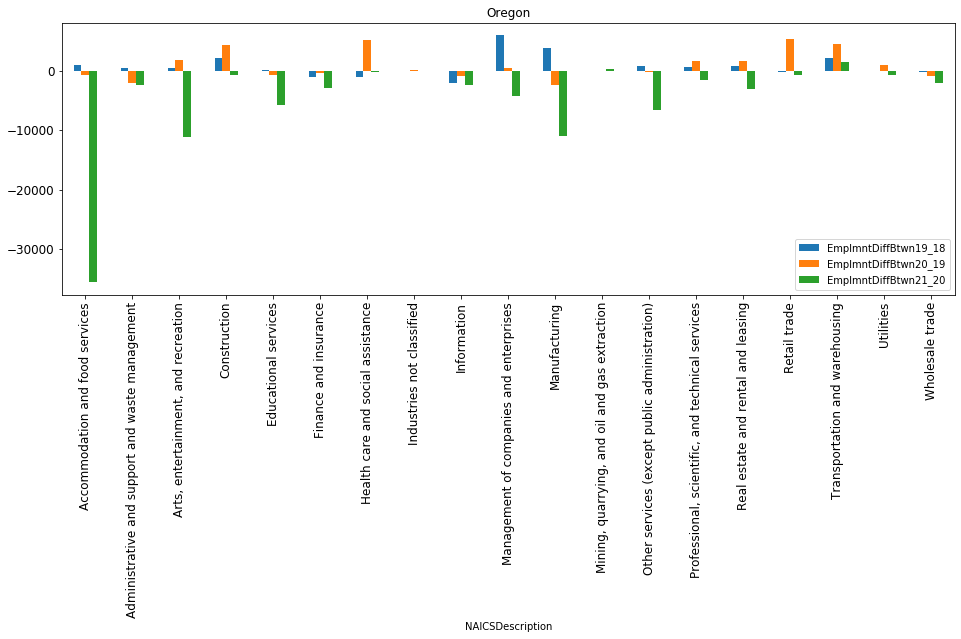

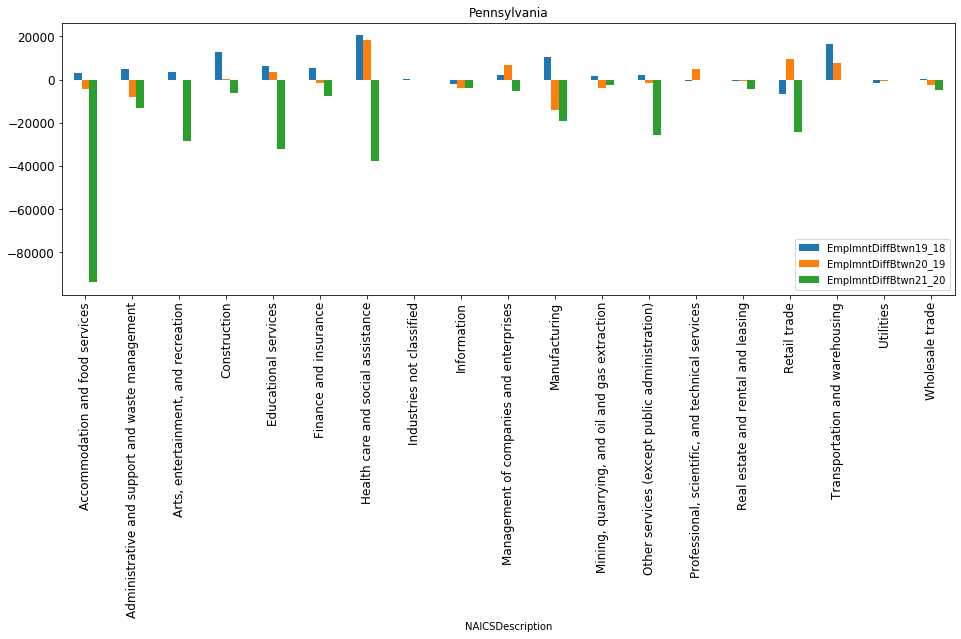

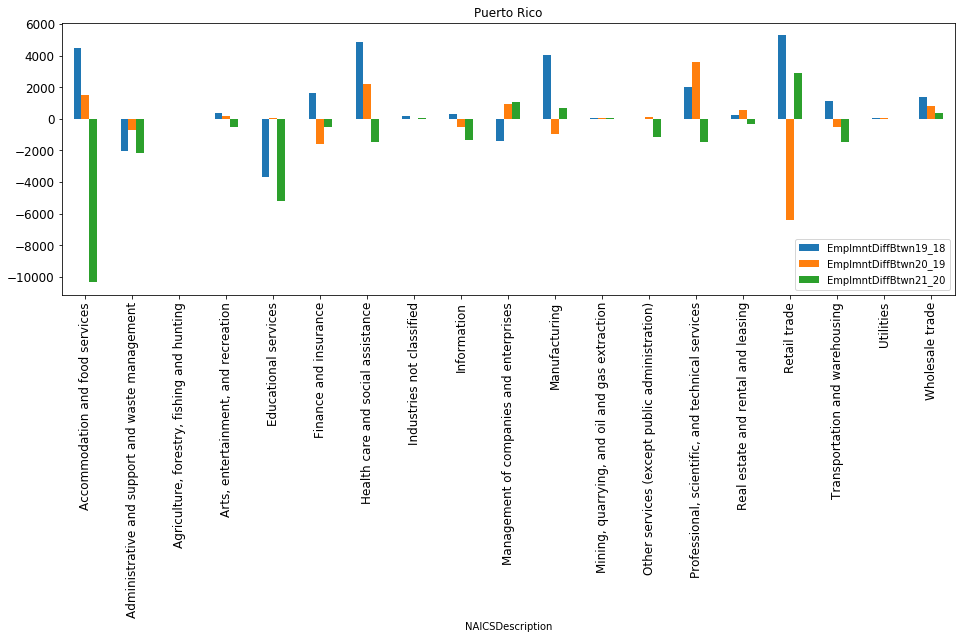

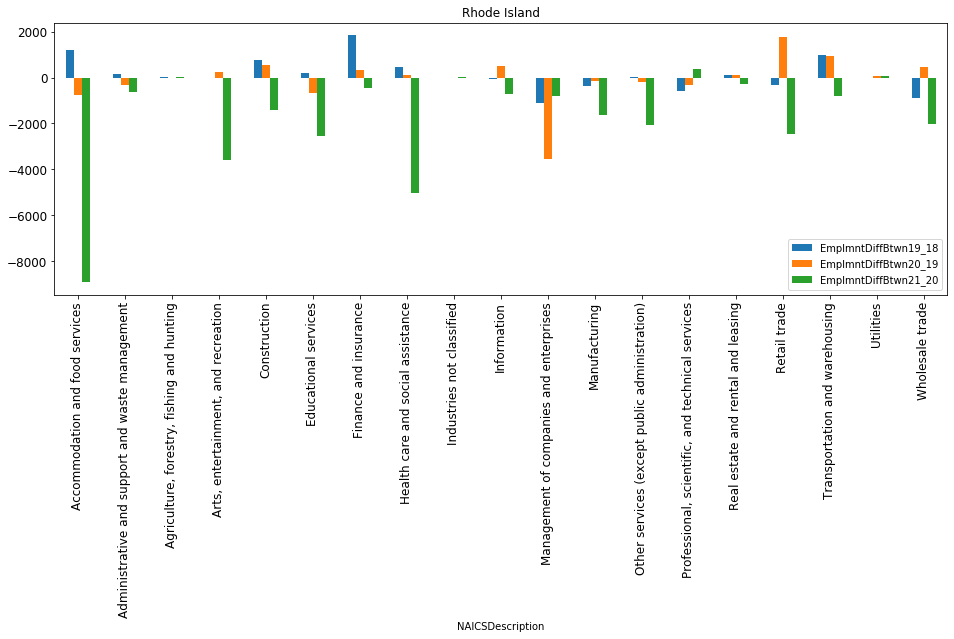

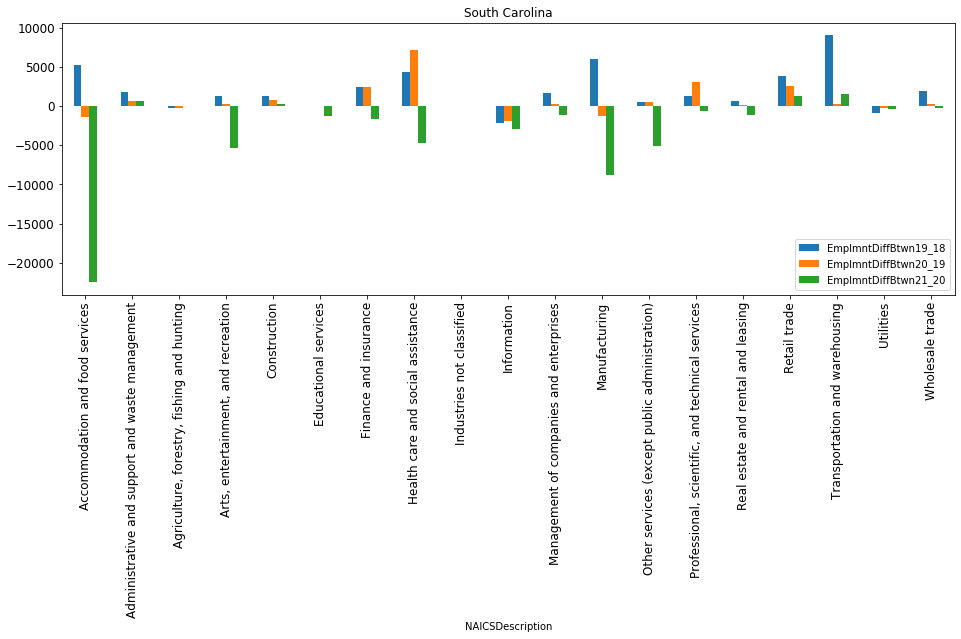

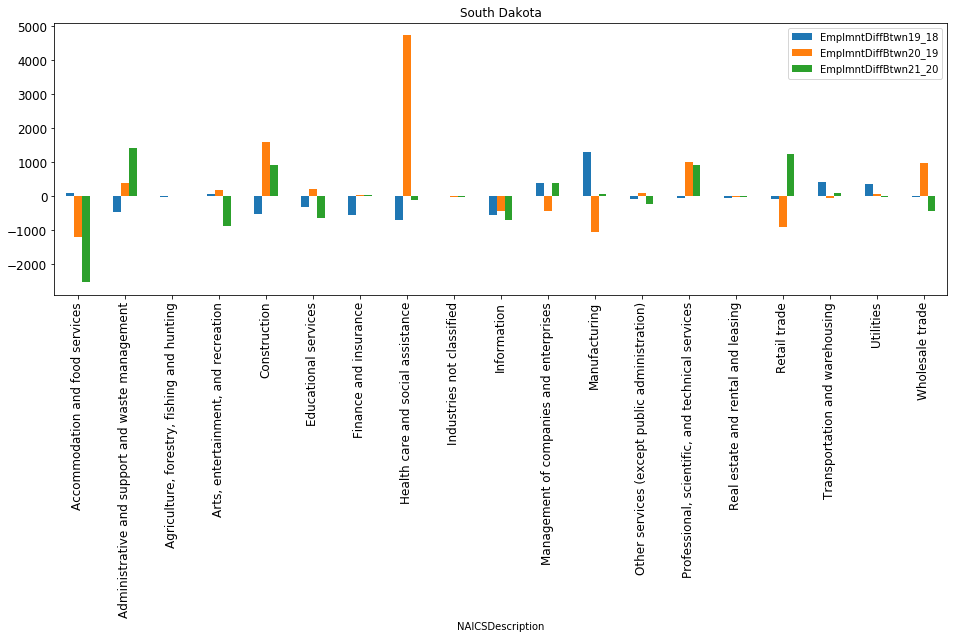

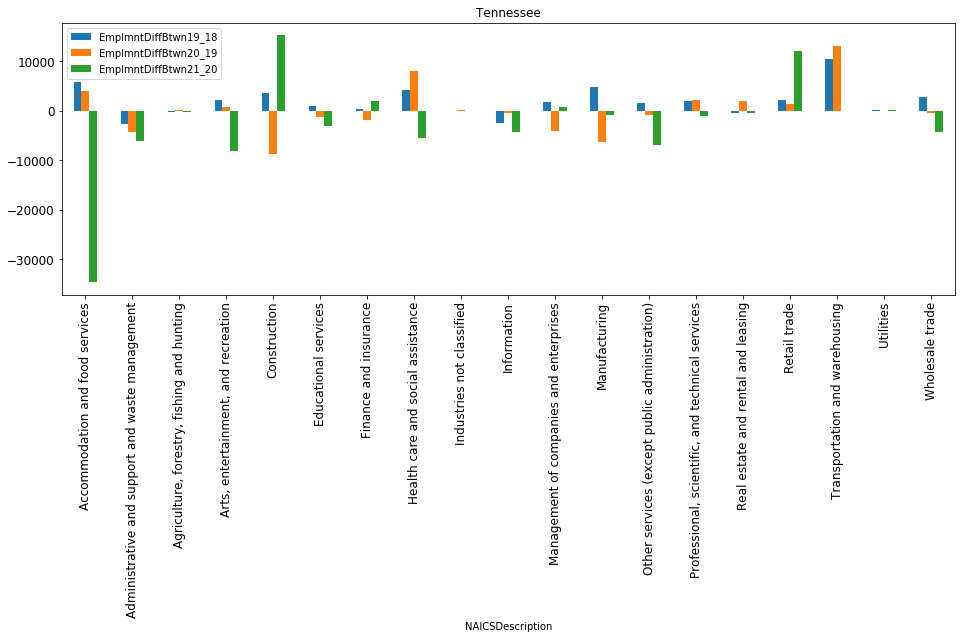

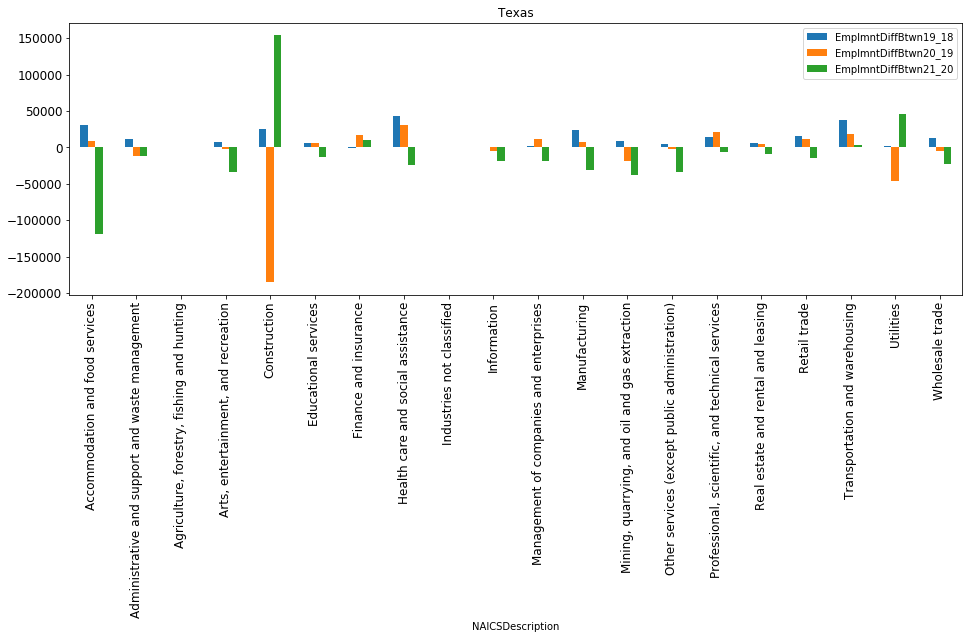

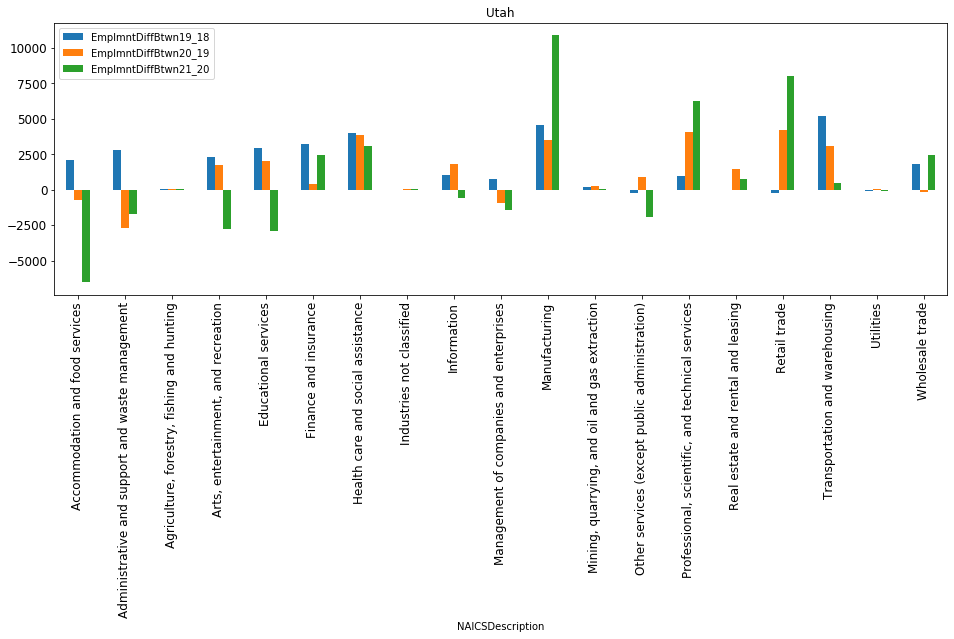

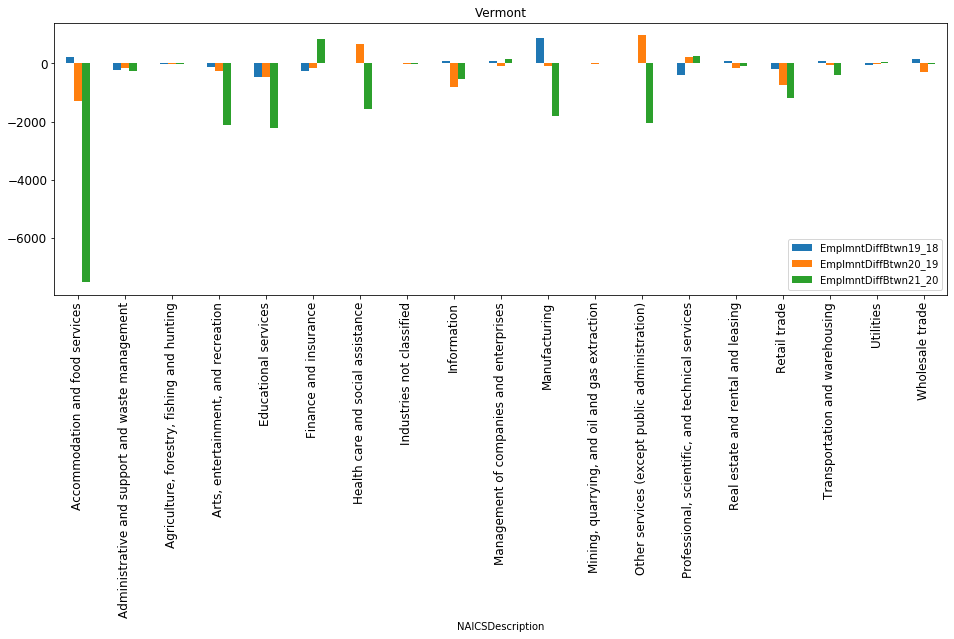

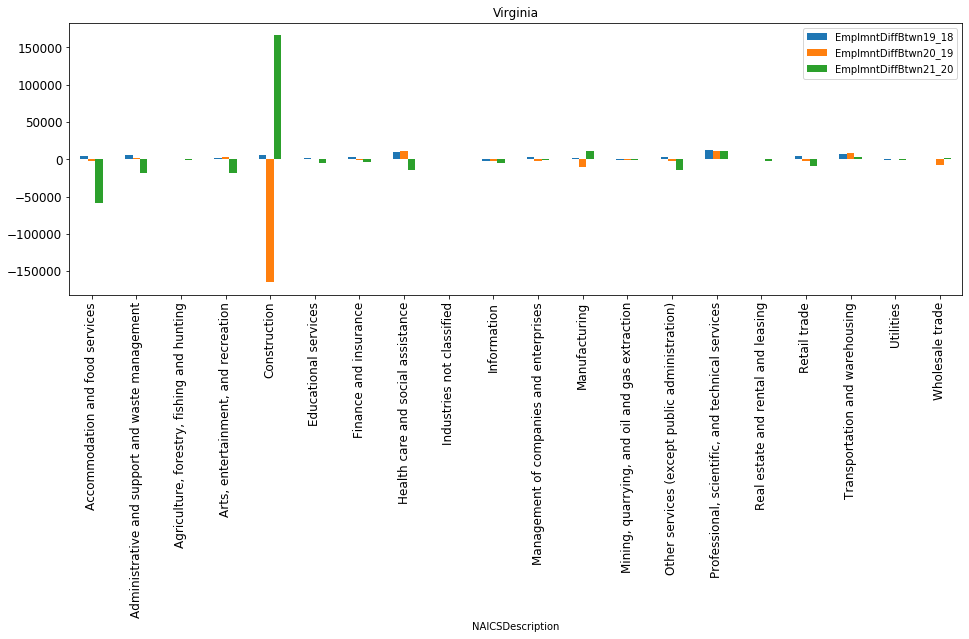

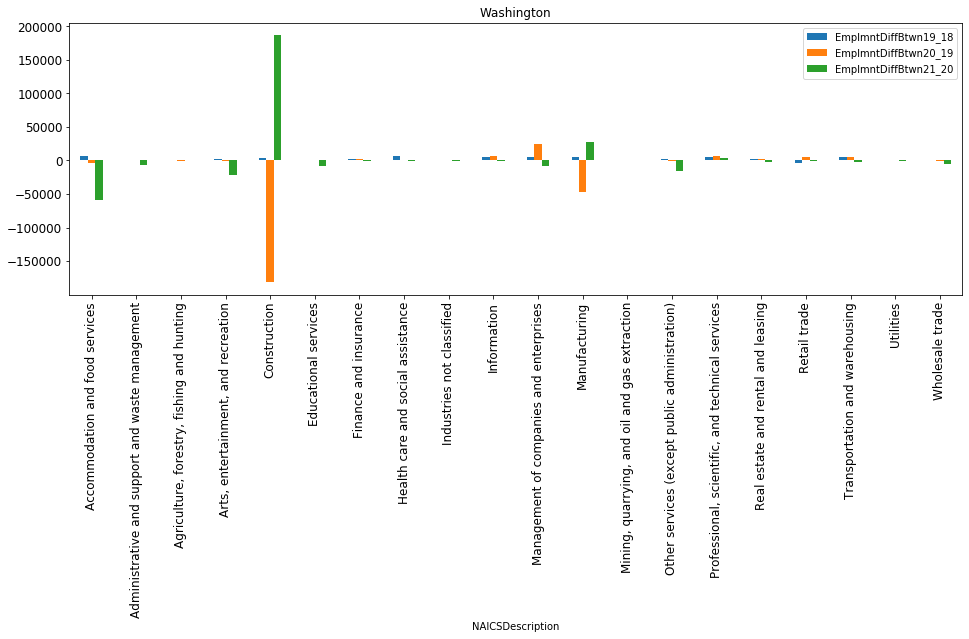

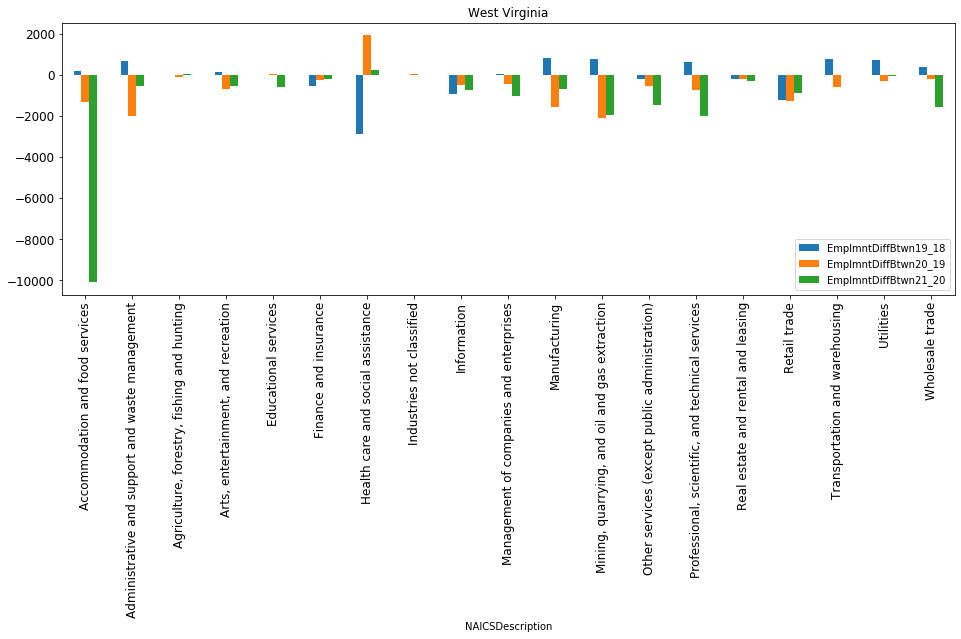

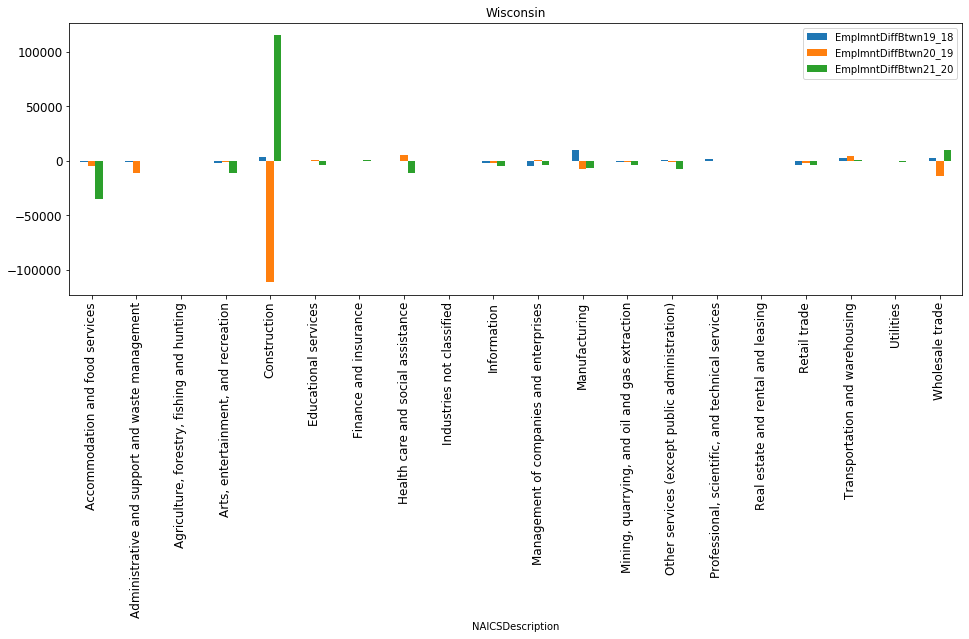

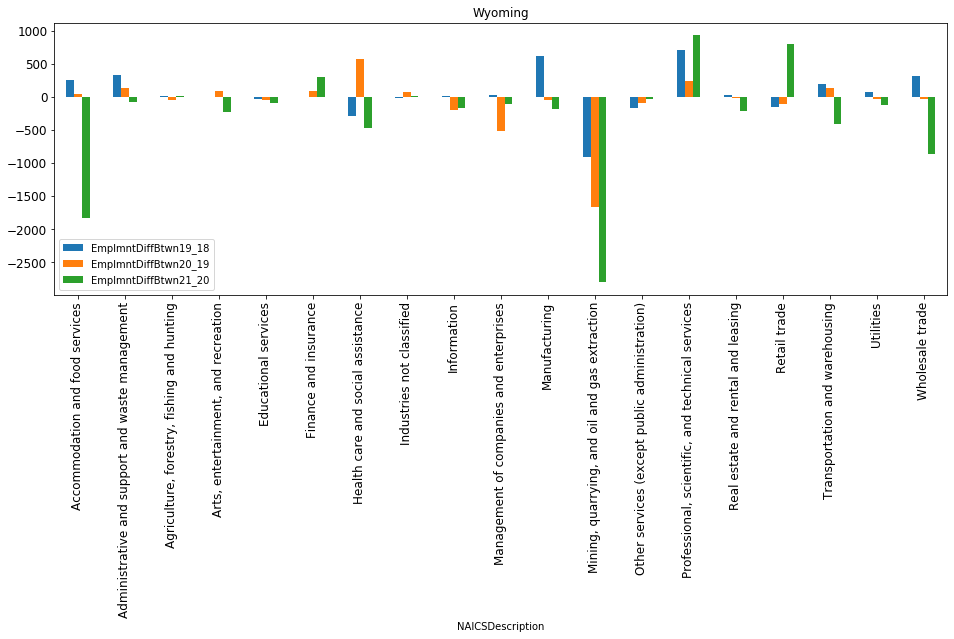

In [347]:

for i in us.State.unique():
    (us.loc[us.State == i].plot('NAICSDescription',['EmplmntDiffBtwn19_18', 'EmplmntDiffBtwn20_19', 'EmplmntDiffBtwn21_20']
                                , kind = 'bar', figsize = (16, 5), fontsize = 12, rot = 90, title = i))